# Week1. Tensor / Datasets - Practice

## 0. Preparing

In [1]:
# These are the libraries will be used for this lab.

import torch 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt


In [ ]:
torch.tensor?



## 1. Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!





### 데이터 타입에 따른 dtype / tensor 정리   
[pytorch 공식사이트 : TORCH.TENSOR](https://pytorch.org/docs/stable/tensors.html)  
  
| datatype | dtype | CPU tensor | GPU tensor|  
| :-: | :-: | :-: | :-: |  
|32bit float | `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor`|  
|64bit float | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor`|  
|16bit float | `torch.float16` or `torch.half`  | `torch.HalfTensor` | `torch.cuda.HalfTensor`|  
|32bit int | `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor`|  
|64bit int | `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor`|  
|16bit int | `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.Short`|

## 1.1. Initializing a Tensor

* Directly from data
* From a Numpy array
* With random or constant values

### 1.1.1. Directly from data

In [7]:
data = [[1, 2],[3, 4]]
x = torch.tensor(data)
x
y =  np.array(data)

In [8]:
print(x)
print(y)

tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


In [9]:
print(type(x))
print(type(y))


<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [10]:
y.shape

(2, 2)

In [11]:
x.shape

torch.Size([2, 2])

In [12]:
x.dtype

torch.int64

In [13]:
y.dtype

dtype('int64')

### 1.1.2 From a NumPy array

In [14]:
np_array = np.array(data)
np_array

array([[1, 2],
       [3, 4]])

In [17]:
torch.tensor(np_array)

np.array( torch.tensor( np.array( torch.tensor(np_array) ) ))

array([[1, 2],
       [3, 4]])

### 1.1.3 With random or constant values

In [43]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
torch.ones(shape)


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [30]:
torch.zeros(shape)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [44]:
x = torch.tensor([ [1.0,1], [1,1] ])
x


tensor([[1., 1.],
        [1., 1.]])

In [45]:
x.dtype

torch.float32

In [42]:
x[1,1]=1.2
x

tensor([[1.0000, 1.0000],
        [1.0000, 1.2000]])

In [ ]:
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(zeros_tensor)

## 1.2. Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [46]:
x

tensor([[1., 1.],
        [1., 1.]])

In [47]:
x.shape

torch.Size([2, 2])

In [48]:
x.dtype

torch.float32

In [52]:
x.device

device(type='cpu')

In [54]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




In [55]:
tensor2 = tensor.to('cuda')
tensor2

tensor([[0.9873, 0.1557, 0.1004, 0.4295],
        [0.0452, 0.6388, 0.0591, 0.1206],
        [0.1326, 0.0352, 0.3496, 0.2734]], device='cuda:0')

In [59]:
tensor*2

tensor([[1.9746, 0.3113, 0.2007, 0.8589],
        [0.0905, 1.2776, 0.1182, 0.2411],
        [0.2652, 0.0704, 0.6992, 0.5468]])

## 1.3. Operations on Tensors


Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described `here <https://pytorch.org/docs/stable/torch.html>`__.

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU). If you’re using Colab, allocate a GPU by going to Runtime > Change runtime type > GPU.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using
``.to`` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!



In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(tensor)

tensor([[0.3386, 0.0135, 0.9135, 0.7295],
        [0.1472, 0.3982, 0.7335, 0.0565],
        [0.6594, 0.1795, 0.2298, 0.3554]], device='cuda:0')


Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




### 1.3.1 Standard numpy-like indexing and slicing:



In [60]:
tensor = torch.rand([4, 4])
tensor

tensor([[0.4850, 0.7630, 0.7455, 0.8779],
        [0.6693, 0.4400, 0.3857, 0.9002],
        [0.3590, 0.4894, 0.8744, 0.3909],
        [0.7704, 0.5151, 0.3052, 0.7545]])

In [71]:

tensor[:,1:2] = 0
# [4,1] = [1,1]



In [72]:
tensor


tensor([[0.4850, 0.0000, 0.7455, 0.8779],
        [0.6693, 0.0000, 0.3857, 0.9002],
        [0.3590, 0.0000, 0.8744, 0.3909],
        [0.7704, 0.0000, 0.3052, 0.7545]])

In [64]:
print(tensor[:,1].shape)

torch.Size([4])


In [65]:
tensor[:, 1:2] # 2-dim [4,1]

tensor([[0.7630],
        [0.4400],
        [0.4894],
        [0.5151]])

In [66]:
tensor[:, 1:2].shape

torch.Size([4, 1])

### 1.3.2 Joining tensors:
 You can use ``torch.cat`` to concatenate a sequence of tensors along a given dimension.
See also `torch.stack <https://pytorch.org/docs/stable/generated/torch.stack.html>`__,
another tensor joining op that is subtly different from ``torch.cat``.



In [74]:
tensor # [4,4] --> [8,4], axis=0
       # [4,4] --> [4,8], axis=1

tensor([[0.4850, 0.0000, 0.7455, 0.8779],
        [0.6693, 0.0000, 0.3857, 0.9002],
        [0.3590, 0.0000, 0.8744, 0.3909],
        [0.7704, 0.0000, 0.3052, 0.7545]])

In [75]:
# do not change dim 
t1 = torch.cat([tensor, tensor], axis=0) #join a sequence of arrays along an existing axis.
print(t1.shape)
t2 = torch.cat([tensor, tensor], axis=1) #join a sequence of arrays along an existing axis.
print(t2.shape)


torch.Size([8, 4])
torch.Size([4, 8])


In [78]:
tensor #[4,4] -- > [2,4,4] axis=0


tensor([[0.4850, 0.0000, 0.7455, 0.8779],
        [0.6693, 0.0000, 0.3857, 0.9002],
        [0.3590, 0.0000, 0.8744, 0.3909],
        [0.7704, 0.0000, 0.3052, 0.7545]])

In [81]:
# change dim
t3 = torch.stack([tensor, tensor], axis=0) #Join a sequence of arrays along a new axis. 
print(t3.shape)

t4 = torch.stack([tensor, tensor], axis=2) #Join a sequence of arrays along a new axis. 
print(t4.shape)

torch.Size([2, 4, 4])
torch.Size([4, 4, 2])


## 1.3.3 Arithmetic operations




In [82]:
# This computes the matrix multiplication between two tensors. y1, y2 will have the same value
y1 = tensor @ tensor.T


print(y1)




tensor([[1.5617, 1.4024, 1.1691, 1.2635],
        [1.4024, 1.4071, 0.9293, 1.3125],
        [1.1691, 0.9293, 1.0462, 0.8383],
        [1.2635, 1.3125, 0.8383, 1.2559]])


In [89]:
X = torch.tensor( [ [3.0, 4] , [2, 1]] )
X_gpu = X.to("cuda")
Y = torch.tensor( [ [2.0], [1] ])
Y_gpu = Y.to("cuda")
print(X)
print(Y)

tensor([[3., 4.],
        [2., 1.]])
tensor([[2.],
        [1.]])


In [90]:
X_gpu@Y_gpu
X.matmul(Y)

tensor([[10.],
        [ 5.]])

In [91]:
# This computes the element-wise product. z1, z2, z3 will have the same value
X


tensor([[3., 4.],
        [2., 1.]])

**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:



In [95]:
X * 2

tensor([[6., 8.],
        [4., 2.]])

In [104]:
X.numpy()
agg = X.sum()
# agg.item()

10.0

In [105]:
agg.numpy()

array(10., dtype=float32)

In [106]:
X.item()

ValueError: ignored

In [ ]:
|agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

6.2615861892700195 <class 'float'>


--------------





## 1.4 Bridge with NumPy:


Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.



Tensor to NumPy array


In [108]:
t = torch.ones(5)
t


n = t.numpy()
n

array([1., 1., 1., 1., 1.], dtype=float32)

A change in the tensor reflects in the NumPy array.



In [ ]:
t[3]=10
print(f"t: {t}")
print(f"n: {n}")

t: tensor([ 2.,  2.,  2., 10.,  2.])
n: [ 2.  2.  2. 10.  2.]


NumPy array to Tensor



In [116]:
n = np.ones(5)
n
t=torch.tensor(n)


Changes in the NumPy array reflects in the tensor.



In [117]:
n[1]=2
print(t)
print(n)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[1. 2. 1. 1. 1.]


# 2. Datasets and Dataloader

Code for processing data samples can get messy and hard to maintain; we ideally want our dataset code
to be decoupled from our model training code for better readability and modularity.
PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model. You can find them
here: `Image Datasets <https://pytorch.org/vision/stable/datasets.html>`_,
`Text Datasets  <https://pytorch.org/text/stable/datasets.html>`_, and
`Audio Datasets <https://pytorch.org/audio/stable/datasets.html>`_




## 2.1 Loading a Dataset


Here is an example of how to load the `Fashion-MNIST <https://research.zalando.com/project/fashion_mnist/fashion_mnist/>`_ dataset from TorchVision.
Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the `FashionMNIST Dataset <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`_ with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations



In [118]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [119]:
import os
path = "/content/drive/MyDrive/Class/2021/2021_2/programming/Actual_Class/Group8_Pytorch"



In [120]:
os.chdir(path)

In [121]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

0

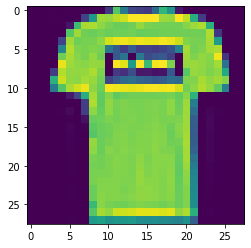

In [130]:
img, label = training_data[1]
label
plt.imshow(img.squeeze())
label

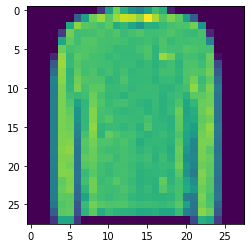

In [137]:
len(training_data)
img = training_data[65][0]
plt.imshow(img.reshape(28,28))

In [136]:
img.squeeze().shape

torch.Size([28, 28])

## 2.2. Iterating and Visualizing the Dataset


We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.



9


torch.Size([1, 28, 28])

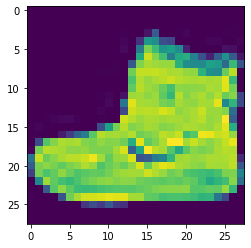

In [ ]:
img, label = training_data[0]
plt.imshow(img.squeeze())
print(label)
img.shape

In [ ]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

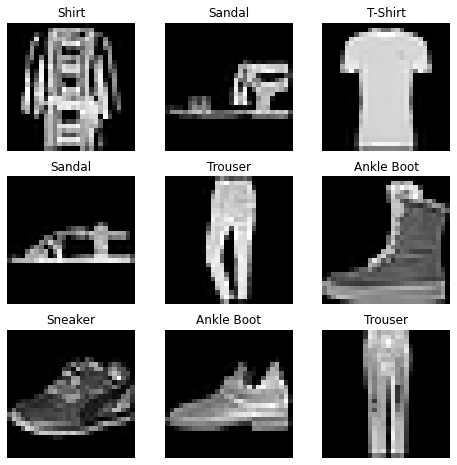

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

..
 .. figure:: /_static/img/basics/fashion_mnist.png
   :alt: fashion_mnist



--------------




## 2.3. Creating a Custom Dataset for your files
---------------------------------------------------



In [ ]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

In [ ]:
length=5
x= 2 * torch.rand([length, 2])
y= torch.sum(x, axis=1) 
#+ torch.rand([length])

In [ ]:
# Define class for dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.rand([length, 2])
        self.y = torch.sum(self.x * torch.tensor([-1.4, 2.0]), axis=1) + torch.rand([length])
        self.transform = transform
     
    # Getter
    def __getitem__(self, index): 
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length 
    def __len__(self): 
        return self.len

In [ ]:
# Create Dataset Object. Find out the value on index 1. Find out the length of Dataset Object.

our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)


Our toy_set object:  <__main__.toy_set object at 0x7fbe36ca4f50>


In [ ]:
print("Value on index 0 of our toy_set object: ", our_dataset[0])

Value on index 0 of our toy_set object:  (tensor([1.2774, 1.0493]), tensor(0.8905))


In [ ]:
print("Our toy_set length: ", len(our_dataset))

Our toy_set length:  100


In [ ]:
XX, YY= our_dataset[0:3]

In [ ]:
XX

tensor([[1.2774, 1.0493],
        [1.3652, 0.6103],
        [0.9271, 0.9100]])

### Exercise 1: 

You are given the following toy data:
```
Y= np.array([3.0, 2.1, 5.8])
X= np.array([[1.0, 0.1],
             [2.5, -0.5], 
             [3.1, 0.7]])
```
Write the code to make Dataset object of X and Y in Pytorch.

### 2.4. Transforms in Dataset

In the previous toy_set, assume that you have 

* X1: house income in dollar
* X2: crime rate

However, you want to transform X1 to Korean won$. Then, you may want to use Transform argument. 


In [ ]:
import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

In [ ]:
class dollar_to_won():
    
    # Constructor
    def __init__(self, currency = 1200.0):
        self.currency = currency
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        #x = x * self.currency
        x[...,1] = x[...,1] * self.currency
        sample = x, y
        return sample

In [ ]:
Y=  torch.tensor([3.0, 2.1, 5.8])
X=torch.tensor([[1.0, 0.1],
             [2.5, -0.5], 
             [3.1, 0.7]])

In [ ]:
try_ftn = dollar_to_won()
try_ftn([X,Y])

(tensor([[   1.0000,  120.0000],
         [   2.5000, -600.0000],
         [   3.1000,  840.0000]]), tensor([3.0000, 2.1000, 5.8000]))

In [ ]:
try_ftn = dollar_to_won()
X=torch.tensor([[2.0,1.0]])
try_ftn([X,2.0])

(tensor([[   2., 1200.]]), 2.0)

In [ ]:
data = toy_set()
d_t_w = dollar_to_won()
tdata = toy_set(transform=d_t_w)


In [ ]:
tdata[0:2]

(tensor([[1.9595e+00, 1.9514e+03],
         [3.1848e-01, 1.3710e+03]]), tensor([0.8290, 1.8927]))

In [ ]:
for i in range(3):
    x, y = data[i]
    xt, yt = tdata[i]
    print('Result of ',i)
    print('Original data - x : {}, y : {}'.format(x,y))
    print('Transformed data - x : {}, y : {}'.format(xt,yt))

Result of  0
Original data - x : tensor([0.7578, 0.3961]), y : 0.47239983081817627
Transformed data - x : tensor([1.9595e+00, 2.3417e+06]), y : 0.8289927244186401
Result of  1
Original data - x : tensor([0.4547, 1.4465]), y : 2.6259167194366455
Transformed data - x : tensor([3.1848e-01, 1.6451e+06]), y : 1.8926995992660522
Result of  2
Original data - x : tensor([1.5990, 0.2420]), y : -1.3360517024993896
Transformed data - x : tensor([1.4325e+00, 1.5562e+03]), y : 1.4378113746643066


# 3. Derivatives

## 3.1. Derivatives

Determine the derivative of 

$ y = 2x^3+x $   

at   $x=1$.


In [ ]:
x = torch.tensor(1., requires_grad=True) #every operation on them should be tracked

y = 2 * x ** 3 + x

y.backward() # calculate derivatives and stores them in the respective tensors' .grad

x.grad

tensor(7.)

$ \frac{dy(x)}{dx} = 6x^{2} + 1$  

$ \frac{dy(x=1)}{dx} = 6*1^{2} + 1$

In [ ]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)



data: tensor(1.)
grad_fn: None
grad: tensor(7.)
data: tensor(3.)
grad_fn: <AddBackward0 object at 0x7ff5209f7750>


In [ ]:
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

is_leaf: True
requires_grad: True


In [ ]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)


data: tensor(3.)
grad_fn: <AddBackward0 object at 0x7ff520953dd0>
grad: None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

is_leaf: False
requires_grad: True


### 2-4. Partial Derivates

#### 참고  
* `requires_grads=True`인 tensor는 tensor를 바로 .numpy() 로 변환 불가능  
* `.detach().numpy()` 로 변환 가능

Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f=uv+(uv)^2$


In [ ]:
# Practice: Calculate the derivative of f = u * v + (u * v) ** 2 at u = 2, v = 1

# Type the code here
u = torch.tensor(2., requires_grad=True)
v = torch.tensor(1., requires_grad=True)
y = u*v + (u*v)**2

y.backward()
print(u.grad, v.grad)

tensor(5.) tensor(10.)


### Exercise 2: 
You are given

$y=\exp(2x_1)+x_2^2$.

Calculate $\triangledown y = \left( \frac{\delta y}{\delta x_1}, 
\frac{\delta y}{\delta x_2} \right)$ at $x_1=1.0$ and $x_2=2.0$.